## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 50%;margin: 0 auto;">The mountain Car Problem</p> 

<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">

Mountain Car is a classic reinforcement learning problem, often used as a benchmark for testing the performance of reinforcement learning algorithms. In this problem, an underpowered car must climb a steep hill to reach a goal located at the top of the hill. The car is subject to the laws of physics, which means that it cannot simply drive straight up the hill. Instead, it must build up speed by accelerating back and forth across the hill.

The state of the Mountain Car environment is represented by two continuous variables, the position and velocity of the car. The goal of the agent is to learn how to control the car's acceleration to climb the hill and reach the goal as quickly as possible while using the least amount of energy. The agent receives a negative reward for every time step it takes to reach the goal, so the goal is to minimize the number of time steps required to reach the goal.

Mountain Car is a challenging problem for reinforcement learning because the state space is continuous and the reward signal is sparse and delayed. This means that the agent must learn how to explore the state space effectively and how to plan ahead to reach the goal, even though the reward signal is not immediately available.

<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">
The Mountain Car MDP is a deterministic MDP that consists of a car placed stochastically at the bottom of a sinusoidal valley, with the only possible actions being the accelerations that can be applied to the car in either direction.The goal of the MDP is to strategically accelerate the car to reach the goal state on top of the right hill. 

In [12]:
!pip install --upgrade numpy gym

## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 50%;margin: 0 auto;">Import Libraries</p> 

In [1]:
import warnings
warnings.simplefilter(action = 'ignore')
import gym
import random
from IPython.display import clear_output 

## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 80%;margin: 0 auto;">Create Mountain Car environment</p> 

In [2]:
# Create an instance of the Mountain Car environment
env = gym.make('MountainCar-v0')


# Reset the environment and get the initial observation
env.reset()

(array([-0.4646901,  0.       ], dtype=float32), {})

## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 80%;margin: 0 auto;">Exploring the Environment</p> 

In [3]:
# Print the state space and action space of the environment

print('State space:', env.observation_space)
print('Action space:', env.action_space)

State space: Box([-1.2  -0.07], [0.6  0.07], (2,), float32)
Action space: Discrete(3)


<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">

These code are used to display the state space and action space of the environment.

The state space is the set of all possible states that the environment can be in. In this code, the output of env.observation_space shows what the state space looks like for the env environment, such as the size and type of values that can be present in each state.

The action space is the set of all actions that the agent can take in the environment. In this code, the output of env.action_space shows what the action space looks like for the env environment, such as the size and type of values that can be present in each action.


In [4]:
# Print the minimum possible values for each variable in the state space

print(env.observation_space.low)

[-1.2  -0.07]


<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">
display the minimum possible values for each variable in the environment's state space.

In this code, env.observation_space.low is used to show the minimum value that each variable in the state space of the env environment can have. For example, if the env environment has two variables named position and velocity, the output of this command will contain two numerical values that represent the minimum possible value for each of these variables in the state space.

In [5]:
# Print the maximum possible values for each variable in the state space
print(env.observation_space.high)

[0.6  0.07]


<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">
    
display the maximum possible values for each variable in the environment's state space.

In this code, env.observation_space.high is used to show the maximum value that each variable in the state space of the env environment can have. For example, if the env environment has two variables named position and velocity, the output of this command will contain two numerical values that represent the maximum possible value for each of these variables in the state space.


<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">

Displaying these values helps us understand the range of input values for the variables in the state space and use this information in designing and implementing reinforcement learning algorithms.


In [6]:
from IPython.display import HTML

# Define the table data
data = [
    ('State Variable', 'Quantity', 'Min', 'Max'),
    ('0', 'Car position', '-1.2', '0.6'),
    ('1', 'Car velocity', '-0.07', '0.07')
]

# Create the HTML table
html = "<table>"
html += "<tr>"
for header in data[0]:
    html += f"<th style='background-color: red; color: white; font-weight: bold; font-size: 18px; padding: 8px; border: 1px solid black;'>{header}</th>"
html += "</tr>"
for row in data[1:]:
    html += "<tr>"
    for cell in row:
        html += f"<td style='text-align: center; border: 1px solid black; padding: 8px;'>{cell}</td>"
    html += "</tr>"
html += "</table>"

# Display the table using HTML
HTML(html)

State Variable,Quantity,Min,Max
0,Car position,-1.2,0.6
1,Car velocity,-0.07,0.07


From this, we can see that the first element of the state vector (representing the cart’s position) can take on any value in the range -1.2 to 0.6, while the second element (representing the cart’s velocity) can take on any value in the range -0.07 to 0.07.

## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 50%;margin: 0 auto;">Q-Learning</p> 


<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">
    
    
Q-Learning is a model-free reinforcement learning algorithm that randomly aims to find the next best action to maximize the reward. It is a value-based learning algorithm that updates the value function based on an equation).

The overall aim of the Q-Learning model is to find the next best course of action, given its current state. For this model to do this, it can generate its own rules or operate outside of the policy it was given. Therefore, this tells us that there is no vital need for a policy, this is why it is known as an off-policy learner.

An off-policy learner means it learns the value of the optimal policy independent of the agent’s actions. Whereas an on-policy learner learns the value of the policy carried out by the agent and finds an optimal policy. 

An example of Q-learning is advertisements based on a recommendation system. Typically, advertisements pop up based on your search history or previous watches. However, with Q-Learning, the model can optimize the ad recommendation system to recommend products that are known to be frequently bought together. The reward signal, in this case, will be generated if the user purchases or clicks on the suggested product.

What does the ‘q’ in Q-Learning stand for? Quality. It represents how effective a given action is in gaining rewards. 

 
## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 50%;margin: 0 auto;">A simple Q-learning algorithm</p> 

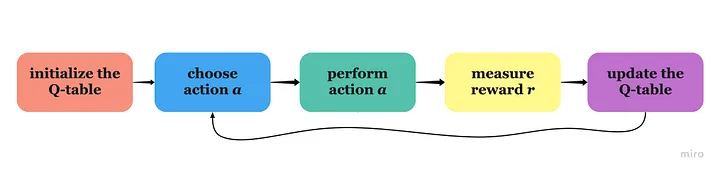

In [7]:
#prints the initial state of an environment using the reset() function.

print(env.reset())

(array([-0.47069544,  0.        ], dtype=float32), {})


In [13]:
# Take an action in the environment and observe the results
print(env.step(2))

(array([-0.46888524,  0.0012053 ], dtype=float32), -1.0, False, False, {})


<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">
To take an action (for example, a = 2), it is necessary to “step forward” the environment by that action using the step() method. 

step() returns a tuple containing: (next_state, reward, DONE, {addtional info})

DONE is a boolean that is True when the episode terminates, False otherwise.

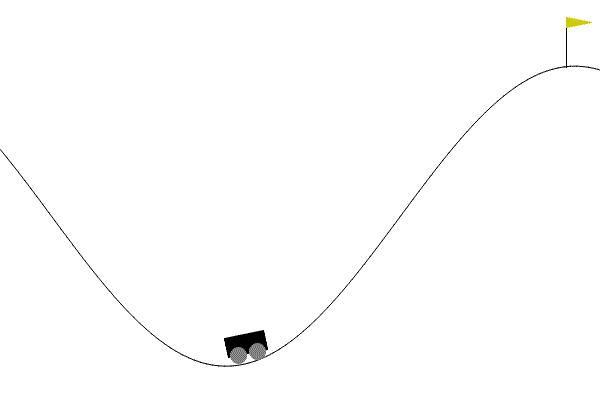

## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 80%;margin: 0 auto;">QLearning Algorithm for Mountain Car Environment</p> 

<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">

If we assume an epsilon-greedy exploration strategy where epsilon decays linearly to a specified minimum (min_eps) over the total number of episodes, we can put all of the above together with the algorithm from the previous section and produce the following function for implementing Q-learning.

In [20]:
import gym
import numpy as np

print(f"Gym version: {gym.__version__}")
print(f"NumPy version: {np.__version__}")


Gym version: 0.26.2
NumPy version: 2.0.2


In [26]:
!pip uninstall gym -y
!pip install gymnasium

In [28]:
# Import necessary libraries: NumPy, Gym, and Matplotlib.

import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt

# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')
# Extract only the state from the tuple returned by env.reset()
state, _ = env.reset()

# Define Q-learning function
def QLearning(env, learning, discount, epsilon, min_eps, episodes):
    # Determine size of discretized state space
    num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
    num_states = np.round(num_states, 0).astype(int) + 1
    
    # Initialize Q table
    Q = np.random.uniform(low=-1, high=1, size=(num_states[0], num_states[1], env.action_space.n))
    
    # Initialize variables to track rewards
    reward_list = []
    ave_reward_list = []
    
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_eps) / episodes
    
    # Run Q-learning algorithm
    for i in range(episodes):
        # Initialize parameters
        done = False
        tot_reward, reward = 0, 0
        state, _ = env.reset()  # Extract state from reset
        
        # Discretize state
        state_adj = (state - env.observation_space.low) * np.array([10, 100])
        state_adj = np.round(state_adj, 0).astype(int)
    
        while not done:
            # Render environment for last five episodes
            if i >= (episodes - 20):
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]])
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, truncated, info = env.step(action)
            done = done or truncated
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low) * np.array([10, 100])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            # Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning * (reward + discount * np.max(Q[state2_adj[0], state2_adj[1]]) - Q[state_adj[0], state_adj[1], action])
                Q[state_adj[0], state_adj[1], action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_eps:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i + 1) % 100 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
    return ave_reward_list


## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 95%;margin: 0 auto;">Plotting Average Rewards of Q-Learning in Mountain Car Environment</p> 


<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">


In this session, we implemented the Q-learning algorithm for the Mountain Car environment. For this purpose, we used the QLearning function that takes the game environment object, learning rate, discount factor, epsilon value, minimum epsilon value, and the number of required episodes as inputs, and calculates the optimal reward for each episode for Q-learning algorithm. We then used the matplotlib library to create a graph of the obtained rewards.

Therefore, it can be concluded that by adjusting Q-learning parameters such as learning rate, discount factor, and epsilon value, we can develop a strategic model to solve the problem. Furthermore, by analyzing the plotted graphs, we can determine the best Q-learning parameters for the Mountain Car environment.


## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 50%;margin: 0 auto;">Average reward per 1000 episodes</p> 



Text(0.5, 1.0, 'Average Reward vs Episodes')

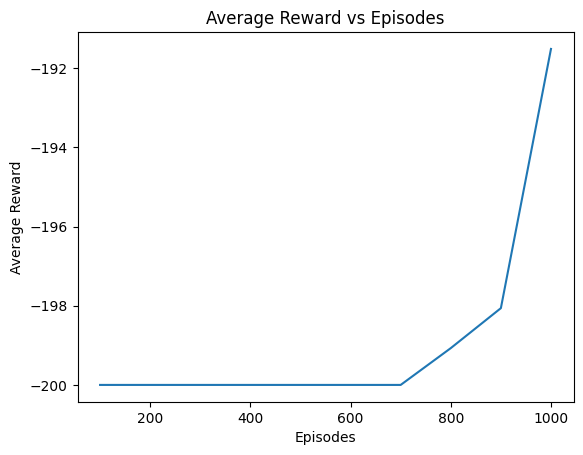

In [29]:
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 1000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 80%;margin: 0 auto;">Average reward per 5000 episodes with a discount factor of 0.8</p> 


Text(0.5, 1.0, 'Average Reward vs Episodes')

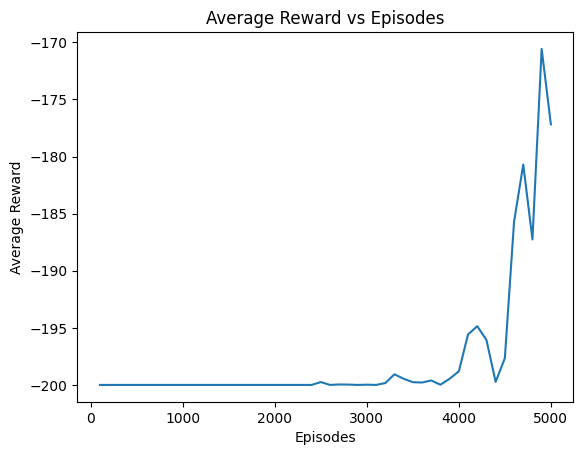

In [30]:
rewards = QLearning(env, 0.2, 0.9, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 80%;margin: 0 auto;">Average reward per 5000 episodes with a discount factor of 0.5</p> 


Text(0.5, 1.0, 'Average Reward vs Episodes')

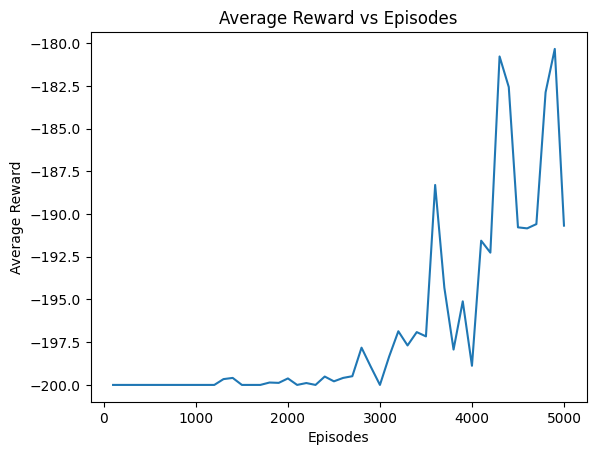

In [31]:
rewards = QLearning(env, 0.2, 0.9, 0.5, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 98%;margin: 0 auto;">Average reward per 5000 episodes with a discount factor of 0.8 and epsilon 0.5</p> 


Text(0.5, 1.0, 'Average Reward vs Episodes')

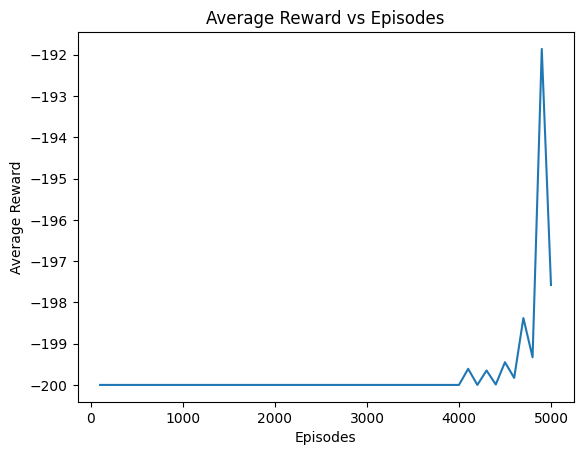

In [32]:
rewards = QLearning(env, 0.2, 0.5, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <p style="background-color:#FFD93D; font-family:calibri; font-size:120%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 98%;margin: 0 auto;">The average reward over 5000 episodes is calculated with a learning rate of 0.2, a discount factor of 0.8, and an epsilon 0.1</p> 


Text(0.5, 1.0, 'Average Reward vs Episodes')

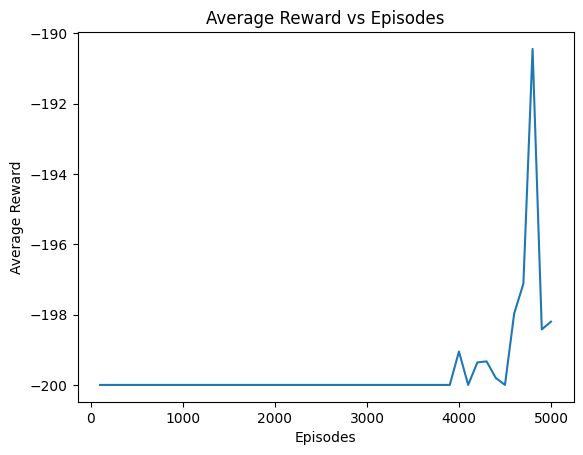

In [33]:
rewards = QLearning(env, 0.2, 0.1, 0.8, 0, 5000)
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')

## <p style="background-color:#FFD93D; font-family:calibri; font-size:90%; color:black; text-align:center; border-radius:2px 2px 30px 30px / 30px 30px 30px 30px  ; padding:20px;width: 50%;margin: 0 auto;">"Results and Summary"</p> 

<div style="border-radius:10px 10px; border: #FFD93D solid; padding: 15px; font-size:110%; text-align:left">

To solve this problem, we needed to discretize the continuous state space.
By changing each of the parameters, different results can be observed in terms of the received reward and the movement of the car towards the target.
These differences in rewards can be visualized in the plotted graphs for each group of parameters, as well as the movement of the car for each group of parameters.
These outputs are visible in the output window.
